Initial steps

The purpose is to build a classifier to predict whether a given car gets high or low gas mileage.

In [3]:
import pandas 
auto = pandas.read_csv("auto.txt", ";")

  

mpg01 is binary variable, denoted mpg01, that is worth 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. 

In [4]:
#get the median of the miles per gallon first to then denote whether the 
# mpg01 variable is going to be 1 or 0
mpg_median = auto['mpg'].median()
# .get_dummies is a pandas function that will assign 0 or 1 if a condition is True or False
#in this case, if the car mpg is greater than the median, it assings 1
mpg01= pandas.get_dummies(auto['mpg'] > mpg_median, drop_first=True) 
#add the mpg01 column of the binary variable to your data set
auto['mpg01']=mpg01

In [5]:
auto.describe() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000
mean,23.699333,5.433333,192.338333,104.050000,2945.846667,15.460000,75.93000,1.616667,0.500000
std,7.963814,1.717183,105.453661,38.959127,849.694403,2.729389,3.67015,0.827853,0.500835
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.00000,1.000000,0.000000
25%,17.000000,4.000000,98.000000,75.000000,2212.500000,13.500000,73.00000,1.000000,0.000000
50%,23.600000,4.000000,140.000000,91.500000,2730.000000,15.400000,76.00000,1.000000,0.500000
75%,29.925000,8.000000,275.750000,129.000000,3526.250000,17.000000,79.00000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,23.500000,82.00000,3.000000,1.000000


In [6]:
mpg_median

23.6

--[Graded question 1 ]--- Use the command auto.describe() to calculate descriptive statistics for all the variables. Comment on the results. What is the median of mpg ?.

 --- ANSWER --- = The median value of the miles per gallon is 23.6. After also taking a look at the description of the data set, it could be observed that the values move from 9.0 as a minimum to 46.0 mpg as a maximum, with a standard deviation of 7.9 which is explains how similar or far is the behavior of column from the median.

--[graded question 2 ]--- How many observations are in each dataset? (files x_train.csv, x_test.csv, y_train.csv and y_test.csv. Import the four datasets.)

-- ANSWER --- =
x_train and y_train : 240 observations

x_test and y_test: 60 observations

In [7]:
x_train = pandas.read_csv("x_train.csv", index_col=0)
y_train = pandas.read_csv("y_train.csv", index_col=0)


In [8]:
x_test = pandas.read_csv("x_test.csv", index_col=0)
y_test = pandas.read_csv("y_test.csv", index_col=0)

In [9]:
y_test.describe()

,mpg01
count,60.000000
mean,0.433333
std,0.499717
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


2.2 Logistic Regression

In [10]:
import statsmodels . api as sm
import statsmodels . formula . api as smf

1. Perform logistic regression with mpg01 as the response and cylinders, weight, displacement and horsepower as predictors. You will need to set the argument as follows fa- mily=sm.families.Binomial() to tell Python to run logistic regression. Previously, do not forget to merge the x_train and the y_train dataframes, to this end you can use the function concat() of the Pandas library as follows :

In [11]:
#get model
family=sm.families.Binomial()

In [12]:
#concat predicots and prediction
auto_train=pandas.concat([x_train,y_train],axis=1)

In [13]:
#indicate the prediction and predictors
formula = 'mpg01 ~ cylinders + weight + displacement + horsepower'
#parameters of model
model = smf.glm(formula = formula, data=auto_train, family=sm.families.Binomial()) 
#fitting the model og logistic regression
logreg = model.fit ()

In [14]:
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  240
Model:                            GLM   Df Residuals:                      235
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61.605
Date:                Sun, 16 Oct 2022   Deviance:                       123.21
Time:                        15:02:39   Pearson chi2:                     275.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.2318      2.179      5.155   

[graded question 3 ] Do any of the predictors appear to be statistically significant ? If so, which ones ? Interpret the
coefficient estimates.

--- ANSWER --- = At a first sight, the coefficient estimates for the predictos indicate that there is proportional relation between the MPG and the Cylinders, this one represents the strongest relationship at first sight, since the value of the coefficient is the highest of them all. HOWEVER, while looking at the p-value of the cylinders which is "0.49" and no smaller than 0.05, it can be infered that the CYLINDERS DO NOT HAVE A STATISCALLY SIGNIFCANT RELATIONSHIP WITH MPG.

In other hand, the horsepower coefficient has the second highest absolute value of the variables, but the sign is negative while it's p-value is below than 0.05, which infers that the horsepower variable has an inverse proportional and signficant relation with the MPG, which means that if the horsepower decreases, the MPG increases.

Another signifcant variable, eventhough the absolut value of the coefficient is  weak compared to the other coefficients, is the weight, which inversely proportional to the MPG, which means, the less weight, the more MPG.

Finally, the dispkayment does not represent a signifcant relationship to MPG due to its p-value.



[graded question 4] The command print(logreg.fittedvalues) allows to print the estimated probability P(mpg01 = 1|X) (where X is the set of explanatory variables). That means, the probability of high mileage, higher than the median given cylinders, weight, displacement and horsepower fixed.


In [15]:
print(logreg.fittedvalues)

134    0.708781
145    0.060105
63     0.896964
293    0.981834
285    0.586649
         ...   
251    0.985506
192    0.072270
117    0.183025
47     0.000046
172    0.073163
Length: 240, dtype: float64


In [16]:
#variable that holds the probability of high mileage, higher than the median, 
#given the 4 predictors
yhat_probs = logreg.fittedvalues

In [17]:
print(yhat_probs )

134    0.708781
145    0.060105
63     0.896964
293    0.981834
285    0.586649
         ...   
251    0.985506
192    0.072270
117    0.183025
47     0.000046
172    0.073163
Length: 240, dtype: float64


In [18]:
#yhat will binary lable the probabilites with 1 if higher than the median
yhat = [1 if x > 0.5 else 0 for x in yhat_probs]

In [19]:
from sklearn.metrics import confusion_matrix , classification_report 

print(classification_report(yhat,y_train,digits=3))

              precision    recall  f1-score   support

           0      0.879     0.919     0.899       111
           1      0.927     0.891     0.909       129

    accuracy                          0.904       240
   macro avg      0.903     0.905     0.904       240
weighted avg      0.905     0.904     0.904       240



In [20]:
print(confusion_matrix(yhat, y_train))

[[102   9]
 [ 14 115]]


Compute the confusion matrix, the accuracy, the train error rate and the classification report for your logistic regression model. Interpret the results in terms d’accuracy, recall and F1-score.

---- ANSWER ---- = 

As we can observe PRECISION for 1 results was higher than for the 0 results, however when looking at RECALL the 0 results have a higher value than the 1 results. Finally looking at the F1 score which means:

 F1 Score: 2 * (Precision * Recall) / (Precision + Recall) 

 And also after looking that most of the values behave aroun 0.9 units, it can be concluded that this logistic regression model it's valuable for this scenario, in which we only needed to predict True or False.

[graded question] The performance indicators calculated in the previous question do not give us any idea about how the model will perform in unknown data as they are calculated using the same data that was used to fit the model. Calculate the performance measures described in the previous question using the test set. You will have to use the predict() function in order to predict the target variable for the test set. For instance, in order to obtain the predicted probabilities run the command logreg.predict(x_test). Interpret the results.

CODE PROCESS TO GET THE ANSWER:

In [21]:
logreg.predict(x_test)

208    0.786887
188    0.985677
12     0.638136
221    0.007639
239    0.154751
136    0.536984
230    0.961990
206    0.709403
52     0.000219
108    0.985480
290    0.968065
15     0.797184
184    0.950519
248    0.989865
22     0.000064
74     0.000301
270    0.957564
90     0.995433
229    0.958168
164    0.002187
190    0.977331
103    0.000183
124    0.121066
129    0.210188
222    0.001325
116    0.049206
194    0.661670
286    0.552359
234    0.669840
295    0.191031
92     0.786302
66     0.937632
8      0.001267
122    0.023773
219    0.075071
150    0.992811
176    0.000226
182    0.636014
299    0.856126
5      0.000003
223    0.000917
89     0.000005
81     0.000040
34     0.168627
55     0.886848
139    0.688929
236    0.986882
64     0.747626
7      0.000407
45     0.769952
73     0.000002
213    0.978250
173    0.067699
106    0.001043
59     0.001151
253    0.183782
168    0.817976
26     0.317598
284    0.789902
153    0.028020
dtype: float64

In [22]:
#save the predictions with the test data 
predictions_test = logreg.predict(x_test)


In [23]:
#binary classification of high and low probablities
predictions_test_binary =  [1 if x > 0.5 else 0 for x in predictions_test]

In [24]:
#classification report for the predicted data vs the real predictions
print(classification_report(predictions_test_binary,y_test,digits=3))

              precision    recall  f1-score   support

           0      0.794     0.931     0.857        29
           1      0.923     0.774     0.842        31

    accuracy                          0.850        60
   macro avg      0.859     0.853     0.850        60
weighted avg      0.861     0.850     0.849        60



In [25]:
print(confusion_matrix(predictions_test_binary, y_test))

[[27  2]
 [ 7 24]]


--- ANSWER --- = In comparision with the previous clasification report of the training data, the model behaves different with this new data from the test set. As we can observed, the precision for False results (0) has decreased by around 0.1, while for the True values, it has also mainly remain the same. Similarly the F1 score for accuracy has decresed by around 0.05. In conclusion after comparing both reports and considering that the amount of high and low probabilites are relatively balanced (as it can be observed looking at the confusion matrix), we can interpret that the model tends to have a better accuracy for predicting True positive results than False positive ones, however the F1 Score for both both reports can be considered moderately good which means thar the model has a moderately good accuracy for this scenario.

---------- K NEAREST NEIGHBORS ----------

In [26]:
from sklearn . neighbors import KNeighborsClassifier 
import numpy as np
neigh = KNeighborsClassifier ( n_neighbors=1) 
neigh.fit(x_train,np.ravel(y_train))
yhat_knn= neigh.predict( x_test )


[graded question] Fit a KNN classifier for the following values of K ∈ {1,3,5,17,51,75,101} and calculate the test error. What value of K would you choose ? For this value of K calculate the performance indicators you calculated in the previous section.

CODE PROCESS FOR THE ANSWER = 

In [27]:
k_values=[1,3,5,17,51,75,101]
train_scores=[]
test_scores=[]
# instantiate the model 
k_nn = KNeighborsClassifier()

In [28]:
#fitting the model for the k_values and registering the test score and train score
for k in k_values: 
  k_nn.n_neighbors=k 
  k_nn.fit(x_train,y_train)
  train_score=k_nn.score(x_train,y_train)
  test_score=k_nn.score(x_test,y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

/Users/matiasmendez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/Users/matiasmendez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/Users/matiasmendez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/Users/matiasmendez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d ar

Text(0.5, 1.0, 'Performace Under Varying K Values')

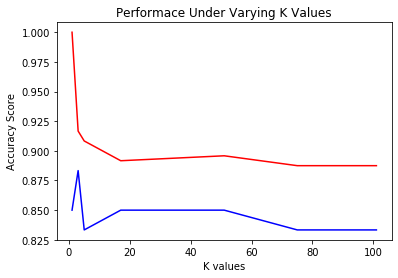

In [29]:
import matplotlib.pyplot as plt

#graphing each score for each k value computed
plt.plot(k_values,train_scores, color='red',label='Training Accuracy')
plt.plot(k_values,test_scores, color='blue',label='Testing Accuracy')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Performace Under Varying K Values')    

--- ANSWER --- = As we can observe on the graph, the red represents the accuracy scores for the train set and the blue  for the test set. We can definitely observe that the best scores are obtained with either k values of 1 or 3. I think I would choose the K=3 since it is the highest for the test set and the second highest on the train set and because there is a big difference for the accuracy scores when choosing k=1 and I think it may probably lean to overfitting. So, next here are the the reports for the model with k=3.

In [30]:
neigh = KNeighborsClassifier ( n_neighbors=3) 
neigh.fit(x_train,np.ravel(y_train))
yhat_knn= neigh.predict( x_test )



In [31]:
print(yhat_knn )

[1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0]


In [32]:
print(classification_report(yhat_knn,y_test,digits=3))

              precision    recall  f1-score   support

           0      0.824     0.966     0.889        29
           1      0.962     0.806     0.877        31

    accuracy                          0.883        60
   macro avg      0.893     0.886     0.883        60
weighted avg      0.895     0.883     0.883        60



In [33]:
print(confusion_matrix(yhat_knn, y_test))

[[28  1]
 [ 6 25]]


ANSWER PART 2 = As it can be infered, the report for the KNN classifer with a value of 3 suggests that the accuracy is around 85% which is good enough to avoid overfitting but there is not still a perfect accuracy.

------------------- Discriminant Analysis --------------

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(x_train,np.ravel(y_train))
yhat_lda=model_lda.predict( x_test )

In [35]:
print(yhat_lda)

[1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0]


In [36]:
print(model_lda.priors_) 


[0.48333333 0.51666667]


In [37]:
print(model_lda.means_)

[[   6.74137931  270.73275862  129.24137931 3585.03448276]
 [   4.15322581  112.25403226   77.85483871 2302.2016129 ]]


 1. [graded question] Interpret the prior probabilities as well as the group means.


ANSWER = Prior probabilities are the likelihood of belonging to a particular group before the interval variables are known. So we can observe that the prior probabilities are slightly higher for the second group with 51%.

While for the group means

2. [graded question] What is the test error of the model obtained with the LDA classifier?

Error rate is calculated as the total number of two incorrect predictions (FN + FP) divided by the total number of a dataset (P + N).  So for that we'll need the confusion matrix.

In [38]:
print(confusion_matrix(yhat_lda, y_test))

[[26  1]
 [ 8 25]]


--- ANSWER --- = The error rate is 9/60 = 15%

3. [graded question] Perform QDA on the training data. What is the test error of the model?


In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Fiting the model with training data
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(x_train,np.ravel(y_train))
yhat_qda=model_qda.predict( x_test )

In [40]:
print(confusion_matrix(yhat_qda, y_test))

[[28  2]
 [ 6 24]]


--- ANSWER --- = The error rate is 8/60 = 13.33% , lower than LDA

4. [graded question] For the two previous fitted models, calculate the confusion matrix and discuss about the obtained results (specificity, sensitivity,...).

--- ANSWER --- =
LDA

- Sensitivy = TP / (TP + FN) = 26/ (26 + 8) = 26/34 = 0.76
- Specifity = TN / (TN + FP) = 25/(25 + 1) = 0.96

QDA

- Sensitivy = TP / (TP + FN) = 28/ (28 + 6) = 28/34 = 0.82
- Specifity = TN / (TN + FP) = 24/(24 + 2) = 0.92

After looking at the Sensitivy, Specificity, and test error of both models, we could assume that they both behave very similar, but somehow based on the test error and the sensivity, the QDA perform a little bit better, probably because its quadratic boundaries did a better classification of the data.



[graded question 5] Perform discriminant analysis using the naive Bayes classifier. First, remind the difference between LDA, QDA and naive Bayes. Then, use the function GaussianNB from the class sklearn.naive_bayes to perform gaussian naive Bayes. Calculate the performance metrics (confusion matrix specificity, sensitivity,...) and comment on the results.

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
bayes = GaussianNB()
bayes_model = bayes.fit(x_train,np.ravel(y_train))
yhat_bayes =bayes_model.predict( x_test )

In [43]:
print(confusion_matrix(yhat_bayes, y_test))

[[28  2]
 [ 6 24]]


In [44]:
tn, fp, fn, tp = confusion_matrix(yhat_bayes, y_test).ravel()
specificity = tn / (tn+fp)

In [45]:
print(specificity)

0.9333333333333333


In [46]:
sensitivity = tp / (tp+fn)
print(sensitivity)

0.8


In [47]:
print("test error :", ((fp+fn)/60) )

test error : 0.13333333333333333


 ---- ANSWER ---- = We can observe that the 3 models of discriminant analysis performed very similar since the data has not changed and the behavior of the model is somehow similar but with very distinct features for each one, all of them generate decision boundaries but obtain them in different ways that are more convenient for different scenarios. If the data presents a Gaussian distribution QDA with be more convenient. Probably with a bigger test data set the differences between the 3 models could more visible there would be a clear best model of them all. By now according to the test error, QDA and Bayes seem to perfom similarly well.

_______ ROC (Receiver operating characteristic) curve ________

[graded question] Now, you can run the following code to perform preliminary calculations to plot de ROC curve : 

 --- ANSWER --- = Interpretation in the comments

In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
#the  scores for the test set are saved 
lda_scores = lda.predict_proba(x_test)[:,1]

In [50]:
#the results of the ROC are saved and the threshold as well
fpr , tpr , thresholds = roc_curve(y_test , lda_scores) 
aire = auc(fpr , tpr)

In [51]:
#the area under the curve of the model is calculated
print(aire)

0.921945701357466


In the above code, interpret the outputs of the roc_curve() function, namely fpr and tpr.
2. [graded question] Finally, to plot the ROC curve use the plt() function from the matplot-
lib.pyplot class.


ValueError: '−−' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

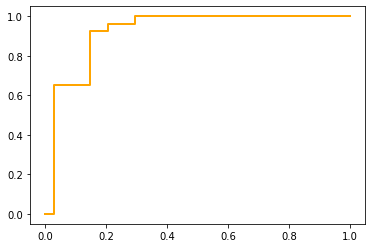

In [53]:
import matplotlib . pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (auc = %0.3f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='−−')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ( 'True Positive Rate ' )
plt.title('ROC curve for LDA classifier')

plt.show()


GRADED QUESTION Calculate the auc and plot the ROC curve for the 4 models LDA, QDA, naive Bayes, logistic regression and KNN. Compare these methods in terms of advantages and disadvantages, then conclude.
       

Plot of QDA

In [59]:
qda_scores = qda.predict_proba(x_test)[:,1]
fpr_qda , tpr_qda, thresholds_qda = roc_curve(y_test , qda_scores) 
aire_qda = auc(fpr_qda , tpr_qda)
print(aire_qda)

0.9185520361990951


ValueError: '−−' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

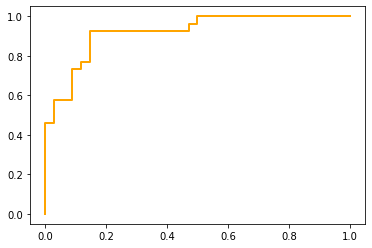

In [55]:
plt.figure()
plt.plot(fpr_qda, tpr_qda, color='orange', lw=2, label='ROC curve (auc = %0.3f)' % aire_qda)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='−−')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ( 'True Positive Rate ' )
plt.title('ROC curve for QDA classifier')

plt.show()

Plot of naive Bayes

In [58]:
bayes_scores = bayes_model.predict_proba(x_test)[:,1]
fpr_bayes , tpr_bayes, thresholds_bayes = roc_curve(y_test , bayes_scores) 
aire_bayes = auc(fpr_bayes , tpr_bayes)
print(aire_bayes)

0.9411764705882353


ValueError: '−−' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

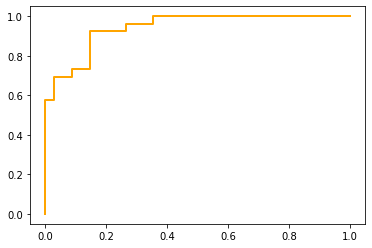

In [60]:
plt.figure()
plt.plot(fpr_bayes, tpr_bayes, color='orange', lw=2, label='ROC curve (auc = %0.3f)' % aire_bayes)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='−−')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ( 'True Positive Rate ' )
plt.title('ROC curve for bayes classifier')

plt.show()

Plot of logistic regression

In [78]:
#it says this method does not exist for this model so i will use the probabilities calculated before
#logreg_scores = logreg.predict_proba(x_test)[:,1]

#I am taking the predictions obtained before
fpr_logreg , tpr_logreg, thresholds_logreg = roc_curve(y_test , predictions_test) 
aire_logreg = auc(fpr_logreg , tpr_logreg)
print(aire_logreg)

0.9434389140271493


ValueError: '−−' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

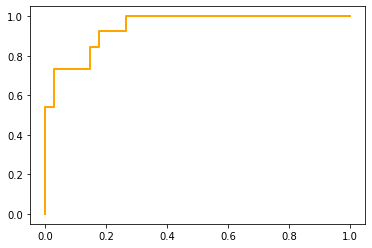

In [79]:
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='orange', lw=2, label='ROC curve (auc = %0.3f)' % aire_bayes)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='−−')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ( 'True Positive Rate ' )
plt.title('ROC curve for bayes classifier')

Plot of KNN

In [80]:
neigh_scores = neigh.predict_proba(x_test)[:,1]
fpr_neigh , tpr_neigh ,thresholds_neigh = roc_curve(y_test , neigh_scores) 
aire_neigh = auc(fpr_neigh , tpr_neigh)
print(aire_neigh)

0.9281674208144796


 --- ANSWER --- After comparing all of the models' area, we can conclude that the best model according to its area under the curve is the Logistic Regression Model, the main reason could be that this model outperfom the others thanks to its capacity to perfom well even when there is not at Gaussian distribution among the data, which that the data set was not normally distributed, if it was the case probably LDA could have perfomed better.